In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv('database_gmal1801.csv')

/home/dufesweeney_gmail_com/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
dataset.dropna (axis=1, how='all', inplace=True)
dataset.replace ('None', 0, regex=True, inplace=True)
dataset.drop (columns=['Unnamed: 0', 'assettypenumber', 'primaryloanservicername'], inplace=True)

In [3]:
dataset.head()

,assetnumber,reportingperiodbeginningdate,reportingperiodendingdate,originatorname,originationdate,originalloanamount,originalloanterm,loanmaturitydate,originalinterestratepercentage,interestcalculationtypecode,...,zerobalanceeffectivedate,zerobalancecode,currentdelinquencystatus,assetsubjectdemandindicator,chargedoffprincipalamount,recoveredamount,modificationtypecode,paymentextendednumber,repossessedindicator,repossessedproceedsamount
0,0001724128 - 000001,07-01-2019,07-31-2019,GM FINANCIAL,11/2015,16477.10,73,03/2022,0.0645,1,...,NaN,NaN,7.0,False,0.0,0.0,NaN,0,False,0.0
1,0001724128 - 000002,07-01-2019,07-31-2019,GM FINANCIAL,11/2015,25507.47,76,10/2022,0.0280,1,...,NaN,NaN,0.0,False,0.0,0.0,NaN,0,False,0.0
2,0001724128 - 000005,07-01-2019,07-31-2019,GM FINANCIAL,11/2015,42746.64,61,03/2021,0.0665,1,...,NaN,NaN,11.0,False,0.0,0.0,NaN,0,False,0.0
3,0001724128 - 000008,07-01-2019,07-31-2019,GM FINANCIAL,11/2015,24377.86,74,04/2022,0.1080,1,...,NaN,NaN,88.0,False,0.0,0.0,NaN,0,False,0.0
4,0001724128 - 000009,07-01-2019,07-31-2019,GM FINANCIAL,11/2015,49155.07,74,08/2022,0.0625,1,...,NaN,NaN,16.0,False,0.0,0.0,NaN,0,False,0.0


In [4]:
dataset.shape

(1021633, 64)

In [5]:
var_factors = ['interestcalculationtypecode', 'interestcalculationtypecode', 'underwritingindicator', 'paymenttypecode',
               'subvented', 'vehiclenewusedcode', 'vehicletypecode', 'vehiclevaluesourcecode',
               'obligoremploymentverificationcode',
               'obligorincomeverificationlevelcode', 'coobligorindicator', 'obligorgeographiclocation',
               'assetaddedindicator',
               'reportingperiodmodificationindicator', 'servicingadvancemethodcode', 'assetsubjectdemandindicator',
               'repossessedindicator']
var_num = ['originalloanamount', 'originalloanterm', 'originalinterestratepercentage', 'vehiclevalueamount',
              'obligorcreditscore',
              'paymenttoincomepercentage', 'remainingtermtomaturitynumber', 'reportingperiodbeginningloanbalanceamount',
              'nextreportingperiodpaymentamountdue',
              'reportingperiodinterestratepercentage', 'nextinterestratepercentage', 'servicingfeepercentage',
              'servicingflatfeeamount',
              'otherservicerfeeretainedbyservicer', 'otherassesseduncollectedservicerfeeamount',
              'scheduledinterestamount', 'scheduledprincipalamount',
              'otherprincipaladjustmentamount', 'reportingperiodactualendbalanceamount',
              'reportingperiodscheduledpaymentamount', 'totalactualamountpaid',
              'actualinterestcollectedamount', 'actualprincipalcollectedamount', 'actualothercollectedamount',
              'serviceradvancedamount',
              'chargedoffprincipalamount', 'recoveredamount', 'repossessedproceedsamount']
var = var_factors + var_num
# Get all the column index for independent variables
column_num = [dataset.columns.get_loc (i) for i in var]
# Creat dependent variables
dataset['Delinquency'] = dataset.loc[:, 'currentdelinquencystatus'] != 0
var_drop = list(set(dataset.columns.values)-set(var))
dataset = pd.get_dummies(dataset, columns=var_factors)

In [6]:
X = dataset.drop (columns=var_drop)
y = dataset['Delinquency']

In [7]:
X.shape

(1021633, 115)

In [8]:
X_na = X.loc[:, X.isna().any()]

In [9]:
from missingpy import MissForest
imputer = MissForest()
X_impute = imputer.fit_transform(X_na)

/home/dufesweeney_gmail_com/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [10]:
X_impute = pd.DataFrame(X_impute, columns=list(X_na.columns.values))

In [11]:
X.update(X_impute)

/home/dufesweeney_gmail_com/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:5732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [14]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (817306, 115) (204327, 115) 

Y_shapes:
 Y_train: Y_validation:
 (817306,) (204327,)


In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [16]:
##Spot-Checking Algorithms
%timeit
models = []

models.append(('LR', LogisticRegression(n_jobs=8)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('XGB', XGBClassifier(n_jobs=8)))
models.append(('RF', RandomForestClassifier(n_jobs=8)))

In [17]:
#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.962523 (0.000996)
LDA: 0.967074 (0.001393)
CART: 0.995067 (0.000341)
XGB: 0.999925 (0.000031)
RF: 0.999762 (0.000037)


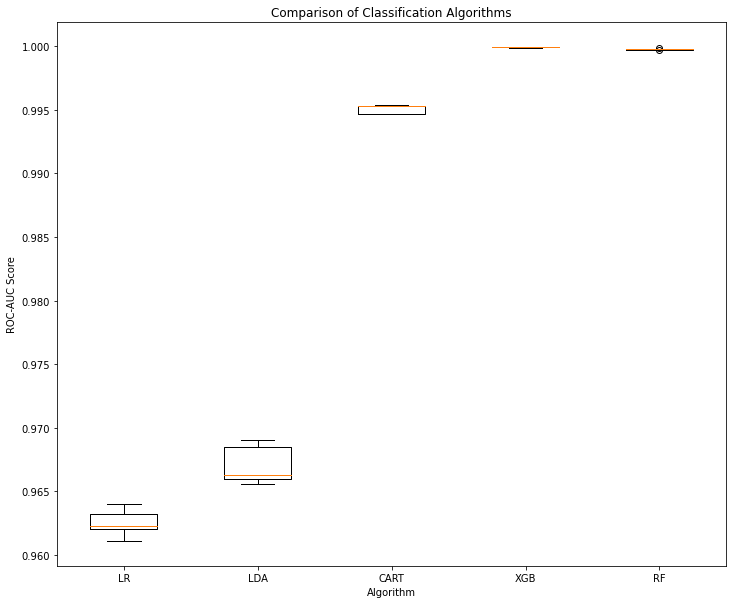

In [18]:
#Compare Algorithms

fig, ax = plt.subplots(figsize=(12, 10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [19]:
xgb = XGBClassifier(n_jobs=8)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [20]:
X_test = X_test.values
preds = xgb.predict(X_test)
print(pd.crosstab(y_test, preds, rownames=['Actual '], colnames=['Predicted ']))

Predicted    False  True 
Actual                   
False       190574     45
True            58  13650


In [21]:
# import joblib

# # Save to file in the current working directory
# joblib_file = "XGBoost.pkl"
# joblib.dump(xgb, joblib_file)

# # Load from file
# joblib_model = joblib.load(joblib_file)

# # Calculate the accuracy and predictions
# score = joblib_model.score(Xtest, Ytest)
# print("Test score: {0:.2f} %".format(100 * score))
# Ypredict = pickle_model.predict(Xtest)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    190619
        True       1.00      1.00      1.00     13708

    accuracy                           1.00    204327
   macro avg       1.00      1.00      1.00    204327
weighted avg       1.00      1.00      1.00    204327



In [23]:
from sklearn.metrics import roc_curve

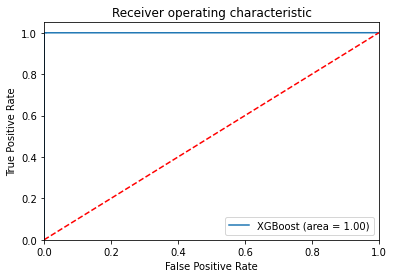

In [25]:
random_roc_auc = roc_auc_score(y_test, xgb.predict(X_test))
random_fpr, random_tpr, random_thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(random_fpr, random_tpr, label='XGBoost (area = %0.2f)' % random_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [32]:
importance_df = pd.DataFrame(list(zip(X, xgb.feature_importances_)), columns=['Features', 'Importances'])
importance_df = importance_df.sort_values(by=['Importances'], ascending=False)
plot_importance = importance_df.head(10)

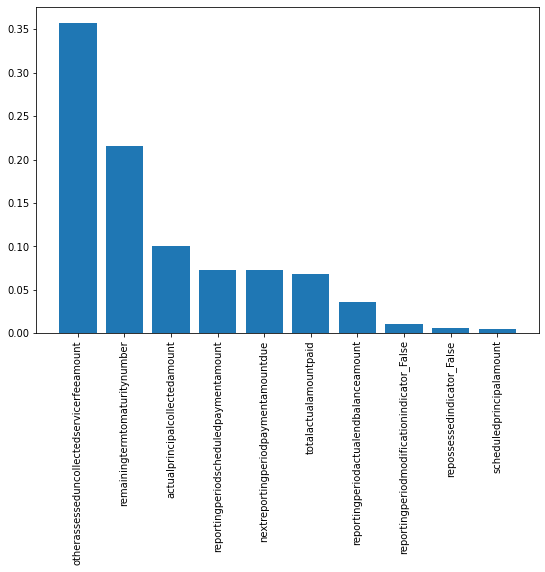

In [33]:
fig, ax = plt.subplots(figsize=(9, 6))
plt.bar(x=plot_importance['Features'], height=plot_importance['Importances'])
plt.xticks(rotation=90)
plt.show()

In [34]:
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)
preds = cart.predict(X_test)
print(pd.crosstab(y_test, preds, rownames=['Actual '], colnames=['Predicted ']))

Predicted    False  True 
Actual                   
False       190525     94
True           130  13578


In [35]:
# # Save to file in the current working directory
# joblib_file = "CART.pkl"
# joblib.dump(cart, joblib_file)

In [36]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    190619
        True       0.99      0.99      0.99     13708

    accuracy                           1.00    204327
   macro avg       1.00      1.00      1.00    204327
weighted avg       1.00      1.00      1.00    204327



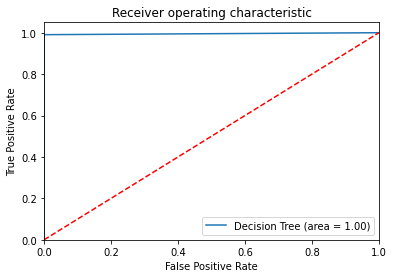

In [37]:
random_roc_auc = roc_auc_score(y_test, cart.predict(X_test))
random_fpr, random_tpr, random_thresholds = roc_curve(y_test, cart.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(random_fpr, random_tpr, label='Decision Tree (area = %0.2f)' % random_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [38]:
importance_df = pd.DataFrame(list(zip(X, cart.feature_importances_)), columns=['Features', 'Importances'])
importance_df = importance_df.sort_values(by=['Importances'], ascending=False)
plot_importance = importance_df.head(10)

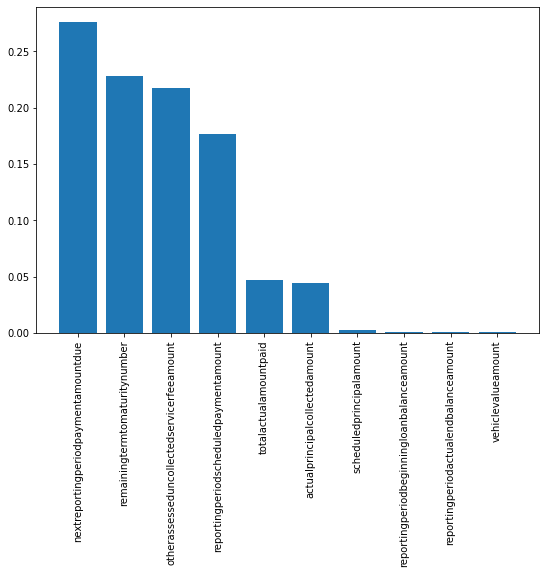

In [39]:
fig, ax = plt.subplots(figsize=(9, 6))
plt.bar(x=plot_importance['Features'], height=plot_importance['Importances'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
RF = RandomForestClassifier(n_jobs=8)
RF.fit(X_train, y_train)

preds = RF.predict(X_test)
print(pd.crosstab(y_test.values.flatten(), preds, rownames=['Actual '], colnames=['Predicted ']))

In [ ]:
# # Save to file in the current working directory
# joblib_file = "RandomForest.pkl"
# joblib.dump(RF, joblib_file)

In [ ]:
print(classification_report(y_test, preds))

In [ ]:
random_roc_auc = roc_auc_score(y_test, RF.predict(X_test))
random_fpr, random_tpr, random_thresholds = roc_curve(y_test, RF.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(random_fpr, random_tpr, label='Random Forest (area = %0.2f)' % random_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
importance_df = pd.DataFrame(list(zip(X, RF.feature_importances_)), columns=['Features', 'Importances'])
importance_df = importance_df.sort_values(by=['Importances'], ascending=False)
plot_importance = importance_df.head(10)

In [ ]:
importance_df.head(20)

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
plt.bar(x=plot_importance['Features'], height=plot_importance['Importances'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# df = pd.DataFrame(X_impute, columns=list(X.columns.values))
# df.loc[:, 'Delinquency'] = y.values
# df.to_csv("database_gmal1801_impute.csv")

In [ ]:
# X_test.loc[:, X_test.columns.duplicated()].head()
# df = X_test['interestcalculationtypecode_1'] # duplicated column
# import numpy as np
# np.where(df.iloc[:,0] != df.iloc[:,1])